<a href="https://colab.research.google.com/github/Imran1hp/Machine-Learning/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!git add .
!git commit -m "Added notebook and parquet files"
!git push origin main


fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
!pip install opendatasets --upgrade --quiet
!pip install plotly matplotlib seaborn --quiet
!pip install scikit-learn --quiet
!pip install numpy --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

In [ ]:
dataset_url ="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 631MB/s]

In [ ]:
import os


In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir +'/weatherAUS.csv'

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd


In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
px.histogram(raw_df ,x='Location',title="Location vs rain",color="RainToday")

In [ ]:
px.histogram(raw_df,
             x="Temp3pm",
             title ="temperature at 3 pm vs. Rain Tomorrow",
             color="RainTomorrow")

In [ ]:
px.histogram(raw_df,
             x="RainTomorrow",
             title ="Rain Tomorrow vs Rain Today",
             color ="RainToday")

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. Vs Rain Today',
           x="MinTemp",
           y='MaxTemp',
           color="RainToday")

In [ ]:
px.strip(raw_df.sample(2000),
         title ="Temp(3 pm) vs. Humaidity(3 pm)",
         x="Temp3pm",
         y="Humidity3pm",
         color ="RainTomorrow")

In [ ]:
use_sample =False

In [ ]:
sample_fraction =0.1

In [ ]:
if use_sample:
  raw_df =raw_df.sample(frac=sample_fraction).copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we are not gonna useing this method for now
tarin_val_df, test_df = train_test_split(raw_df,test_size =0.2,random_state=42)
tarin__df,val_df =train_test_split(tarin_val_df,test_size=0.25,random_state=42)

In [ ]:
print("train_df.shape",tarin__df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape (84471, 23)
val_df.shape (28158, 23)
test_df.shape (28158, 23)


<Axes: title={'center': 'no. of Row per Year '}, xlabel='Date', ylabel='count'>

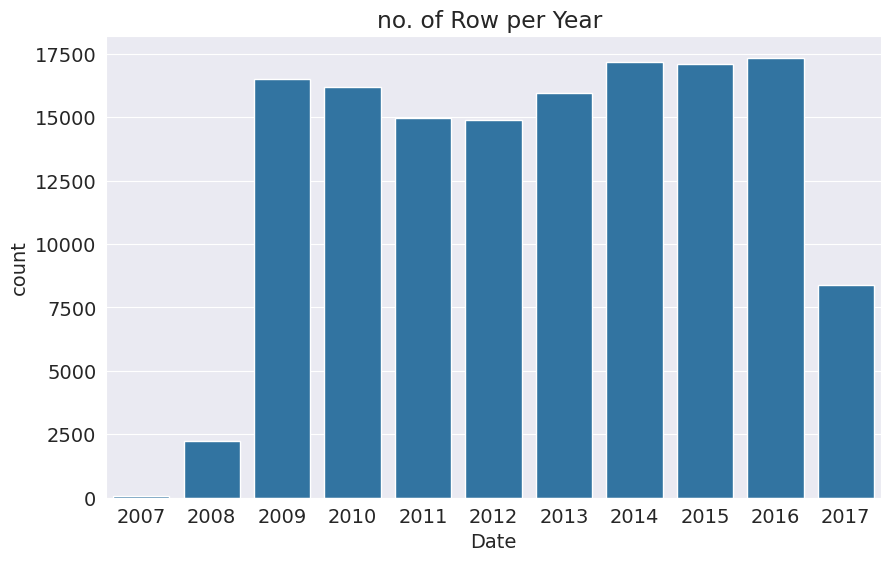

In [ ]:
plt.title('no. of Row per Year ')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df =raw_df[year==2015]
test_df = raw_df[year>2015]

In [ ]:
print("train_df.shape",tarin__df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape (84471, 23)
val_df.shape (17089, 23)
test_df.shape (25710, 23)


In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [ ]:
input_cols =list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)
print(target_col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
RainTomorrow


In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = val_df[[target_col]].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_targets

RainTomorrow
2133             No
2134             No
2135             No
2136             No
2137             No
...             ...
144913           No
144914           No
144915           No
144916           No
144917           No

[17089 rows x 1 columns]

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets =test_df[target_col].copy()

In [ ]:
import numpy as np

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
?SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy ='mean')

In [ ]:
raw_df[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
train_inputs[numerical_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [ ]:
imputer.fit(raw_df[numerical_cols])

SimpleImputer()

In [ ]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [ ]:
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6     5.472516   7.63054   
1        Albury      7.4     25.1       0.0     5.472516   7.63054   
2        Albury     12.9     25.7       0.0     5.472516   7.63054   
3        Albury      9.2     28.0       0.0     5.472516   7.63054   
4        Albury     17.5     32.3       1.0     5.472516   7.63054   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0     5.472516   7.63054   
144549    Uluru     15.1     36.8       0.0     5.472516   7.63054   
144550    Uluru     17.3     37.8       0.0     5.472516   7.63054   
144551    Uluru     20.1     38.5       0.0     5.472516   7.63054   
144552    Uluru     22.5     39.6       0.0     5.472516   7.63054   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1  8.000000   
1              44.0         25.0       1010.6       1007.8  4.431161   
2              38.0         30.0       1007.6       1008.7  4.431161   
3              45.0         16.0       1017.6       1012.8  4.431161   
4              82.0         33.0       1010.8       1006.0  7.000000   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8  4.431161   
144549         16.0          8.0       1012.6       1007.6  4.431161   
144550         15.0          8.0       1011.9       1008.0  4.431161   
144551         22.0          9.0       1014.0       1009.2  4.431161   
144552         16.0          9.0       1012.1       1006.2  4.431161   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0        4.49925     16.9     21.8         No  
1        4.49925     17.2     24.3         No  
2        2.00000     21.0     23.2         No  
3        4.49925     18.1     26.5         No  
4        8.00000     17.8     29.7         No  
...          ...      ...      ...        ...  
144548   4.49925     23.7     31.8         No  
144549   4.49925     28.9     34.8         No  
144550   4.49925     29.7     35.7         No  
144551   4.49925     29.8     37.2         No  
144552   4.49925     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

In [ ]:
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

In [ ]:
train_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.211879      0.100680      0.000017      0.000255      0.036232   
std        0.003525      0.002493      0.000062      0.000149      0.013857   
min        0.200472      0.090987      0.000000      0.000000      0.000000   
25%        0.209372      0.098849      0.000000      0.000181      0.035672   
50%        0.211764      0.100457      0.000000      0.000260      0.036293   
75%        0.214434      0.102422      0.000006      0.000266      0.043757   
max        0.224057      0.109641      0.002695      0.003919      0.068014   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       -0.044457      0.000834      0.002479      0.006863      0.005147   
std         0.000794      0.000529      0.001166      0.001890      0.002064   
min        -0.046512      0.000000      0.000000      0.000000      0.000000   
25%        -0.045009      0.000414      0.001718      0.005700      0.003700   
50%        -0.044529      0.000769      0.002510      0.006900      0.005200   
75%        -0.044108      0.001124      0.003171      0.008300      0.006500   
max        -0.038760      0.005148      0.011494      0.010000      0.010000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean     -16.196496    -15.623861      0.053688      0.054855      0.162597   
std        0.001840      0.001706      0.028387      0.026448      0.002842   
min      -16.206612    -15.633114      0.000000      0.000000      0.152477   
25%      -16.197623    -15.624947      0.037037      0.037037      0.160533   
50%      -16.196461    -15.623832      0.054706      0.055546      0.162492   
75%      -16.195328    -15.622797      0.074074      0.074074      0.164584   
max      -16.190083    -15.617600      0.111111      0.111111      0.172996   

            Temp3pm  
count  97988.000000  
mean       0.113572  
std        0.002509  
min        0.103757  
25%        0.111752  
50%        0.113373  
75%        0.115252  
max        0.122620

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder =OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [ ]:
train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] =encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] =encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.212654  0.100636  0.000004      0.00026  0.036293   
1        Albury  0.209316  0.101422  0.000000      0.00026  0.036293   
2        Albury  0.212375  0.101636  0.000000      0.00026  0.036293   
3        Albury  0.210317  0.102458  0.000000      0.00026  0.036293   
4        Albury  0.214934  0.103995  0.000007      0.00026  0.036293   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.214600  0.104316  0.000000      0.00026  0.036293   
144549    Uluru  0.213599  0.105603  0.000000      0.00026  0.036293   
144550    Uluru  0.214823  0.105960  0.000000      0.00026  0.036293   
144551    Uluru  0.216380  0.106210  0.000000      0.00026  0.036293   
144552    Uluru  0.217715  0.106603  0.000000      0.00026  0.036293   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
0                W      -0.044228          W        WNW  ...            0.0   
1              WNW      -0.044228        NNW        WSW  ...            0.0   
2              WSW      -0.044108          W        WSW  ...            0.0   
3               NE      -0.045430         SE          E  ...            0.0   
4                W      -0.044408        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE      -0.044288        ESE        SSE  ...            0.0   
144549          NE      -0.045009        ENE         SW  ...            0.0   
144550         ESE      -0.044529        ESE        SSE  ...            0.0   
144551         ESE      -0.044288        ESE        SSW  ...            0.0   
144552         WNW      -0.042305        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
144548            0.0  
144549            0.0  
144550            0.0  
144551            0.0  
144552            0.0  

[97988 rows x 123 columns]

In [ ]:
print('train_inputs',train_inputs.shape)
print('train_targets',train_targets.shape)
print('val_inputs',val_inputs.shape)
print('val_targets',val_targets.shape)
print('test_inputs',test_inputs.shape)
print('test_targets',test_targets.shape)

train_inputs (97988, 123)
train_targets (17089, 1)
val_inputs (17089, 123)
val_targets (17089,)
test_inputs (25710, 123)
test_targets (25710,)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [ ]:
%%time
train_inputs =pd.read_parquet('train_inputs.parquet')
train_targets =pd.read_parquet('train_targets.parquet')
val_inputs =pd.read_parquet('val_inputs.parquet')
val_targets =pd.read_parquet('val_targets.parquet')
test_inputs =pd.read_parquet('test_inputs.parquet')
test_targets =pd.read_parquet('test_targets.parquet')

CPU times: user 306 ms, sys: 181 ms, total: 488 ms
Wall time: 502 ms


In [ ]:
print('train_inputs',train_inputs.shape)
print('train_targets',train_targets.shape)
print('val_inputs',val_inputs.shape)
print('val_targets',val_targets.shape)
print('test_inputs',test_inputs.shape)
print('test_targets',test_targets.shape)

train_inputs (97988, 123)
train_targets (17089, 1)
val_inputs (17089, 123)
val_targets (17089, 1)
test_inputs (25710, 123)
test_targets (25710, 1)
